# AM207 Final Project

Paper: *Learned Uncertainty-Aware (LUNA) Bases for Bayesian Regression using Multi-Headed Auxiliary Networks*

207Notes:
 -  reproduce figure 6 (rows are random restarts, see main paper) with NLM 2 hidden layers 50-50
 -  new code: plot the priors
 -  verify in paper, how many iterations were done for this figure, verify data generating process
 - 
 -  

In [1]:
# this code is for an elaine problem:
import sys
sys.path.append('/Users/elainecunha/opt/anaconda3/envs/py3.8/lib/python3.8/site-packages')

In [2]:
from autograd import numpy as np
from autograd import grad
from autograd.misc.optimizers import adam, sgd
from autograd import scipy as sp
import autograd.numpy.random as npr
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import sys
import time

# our libraries
import utils
from nlm import NLM
from feed_forward import Feedforward
import bayes_helpers as bh

### Generate Data

In [3]:
number_of_points = 50
x_train, y_train, x_test = utils.generate_data(number_of_points)

#### Define NN Hyperparameters

In [4]:
###relu activation
activation_fn_type = 'relu'
activation_fn = lambda x: np.maximum(np.zeros(x.shape), x)


###neural network model design choices
width = 50
hidden_layers = 2
input_dim = 1
output_dim = 1

architecture = {'width': width,
               'hidden_layers': hidden_layers,
               'input_dim': input_dim,
               'output_dim': output_dim,
               'activation_fn_type': 'relu',
               'activation_fn_params': 'rate=1',
               'activation_fn': activation_fn}

#set random state to make the experiments replicable
rand_state = 0
random = np.random.RandomState(rand_state)

### NLM Demo

In [5]:
# create instance of NLM
prior_var = 1.0
y_var = 1.0
regularization_param_nlm = 1.0
test_nlm = NLM(prior_var,y_var, regularization_param_nlm,architecture, random_state = np.random.RandomState(0))

In [6]:
# train NLM
params = {'step_size':1e-3, 
          'max_iteration':1000, 
          'random_restarts':1,
          'optimizer':'adam'}

t0 = time.time()
test_nlm.train(x_train,y_train, params)
nlm_time = np.round(time.time() - t0, 3)
print(f"{nlm_time} Seconds")

 Iteration 900 lower bound 50.98307753734899; gradient mag: 6.35103410495773884
Done Training
10.097 Seconds


In [10]:
# calculate posterior and prior predictives
posterior_predictives, posterior_predictive_samples, prior_predictives, prior_predictive_samples = test_nlm.predict(x_test, prior=True)

In [11]:
# calculate ground truth line
f = lambda x: (x**3)/2
x_true = np.linspace(-10, 10, 100)
y_true = f(x_true)

# calculate posterior predictive mean
post_pred_mean = np.mean(posterior_predictive_samples, axis=0)
pp_upper = np.percentile(posterior_predictive_samples, 97.5, axis=0)
pp_lower = np.percentile(posterior_predictive_samples, 2.5, axis=0)

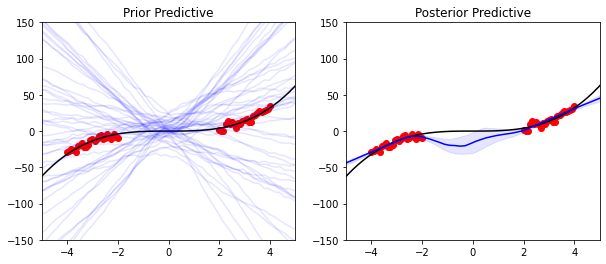

In [12]:
# plot prior predictives

fig,ax = plt.subplots(1,2, figsize=(10,4))
ax[0].scatter(x_train, y_train, color='red')
ax[1].scatter(x_train, y_train, color='red')
ax[0].plot(x_true, y_true, color='black')
ax[1].plot(x_true, y_true, color='black')
ax[1].plot(x_test.flatten(), post_pred_mean, color='blue')
ax[1].fill_between(x_test.flatten(), pp_upper, pp_lower, color='blue', alpha=0.1, label='95% Pred. Interval') 

for i in range(50):

    ax[0].plot(x_test.flatten(), prior_predictive_samples[i,:], alpha = 0.1, color='blue')
    
ax[0].axis([-5, 5, -150, 150])
ax[1].axis([-5, 5, -150, 150])
ax[0].set_title('Prior Predictive')
ax[1].set_title('Posterior Predictive')

plt.show()